In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('C:/mydata/Order_earnings_ebay.csv')
df.columns = df.iloc[14]
df= df.drop(index=range(0,15))

df = df.reset_index()


#Change to numeric and drops any unecessary symbols and convert to Float
df['Order earnings'] = pd.to_numeric(
    df['Order earnings'].str.replace(r'[^\d.]', '', regex=True)
)

In [14]:
state_max = pd.DataFrame(df['Ship to province/region/state'].value_counts())
state_max.rename(columns={'count': 'Count'}, inplace= True)

state_max.index.name = 'States Shipped'
state_max

df['Expenses'] = pd.to_numeric(df['Expenses'].str.replace(r'[^\d.]', '', regex=True))
df['Shipping labels'] = pd.to_numeric(df['Shipping labels'].str.replace(r'[^\d.]', '', regex=True))

AttributeError: Can only use .str accessor with string values!

<Figure size 1000x600 with 0 Axes>

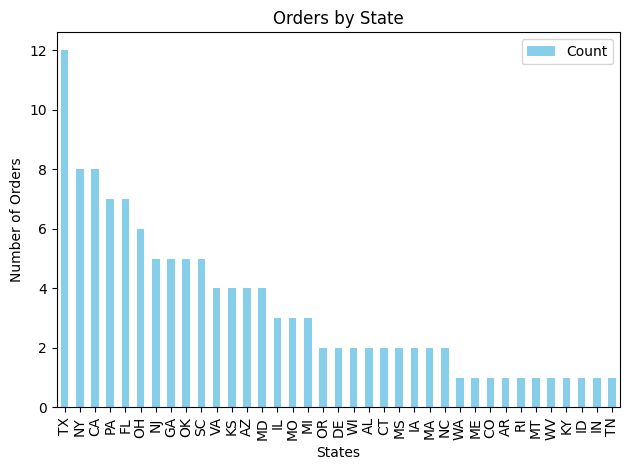

In [5]:
plt.figure(figsize=(10,6))
state_max.plot(kind='bar', color='skyblue')


plt.title('Orders by State')
plt.xlabel('States')
plt.ylabel('Number of Orders')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [6]:
#Grouping data together that is relevant
grouped = df.groupby('Ship to province/region/state')['Order earnings'].sum()

In [7]:
grouped

Ship to province/region/state
AL     80.96
AR     12.47
AZ    123.82
CA    227.53
CO      0.05
CT     29.63
DE    107.37
FL    160.96
GA    234.16
IA     75.75
ID     24.55
IL     85.20
IN     23.43
KS     56.43
KY     40.38
MA     39.01
MD    276.39
ME      5.79
MI     55.65
MO     57.79
MS     57.57
MT     46.00
NC     23.58
NJ    284.06
NY    262.22
OH    188.91
OK     99.72
OR     30.09
PA    251.00
RI     23.05
SC    225.22
TN     24.16
TX    415.51
VA    186.34
WA     12.05
WI     35.07
WV     11.44
Name: Order earnings, dtype: float64

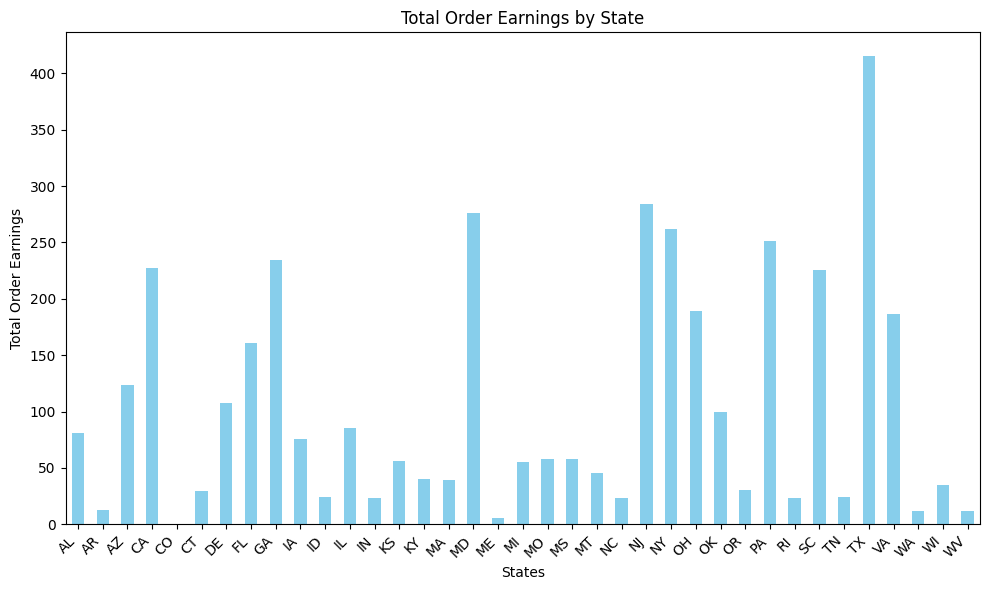

In [8]:
plt.figure(figsize=(10, 6))  # Set the figure size
grouped.plot(kind='bar', color='skyblue')  # Bar plot with skyblue color

# Add titles and labels
plt.title('Total Order Earnings by State')
plt.xlabel('States')
plt.ylabel('Total Order Earnings')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

In [10]:
total_expenses = df['Expenses'].sum()
order_earnings = df['Order earnings'].sum()
total_profit = order_earnings - total_expenses


In [16]:
profit_report = pd.Series([order_earnings, total_expenses, total_profit])
profit_report.index = ['Earnings:','Expenses:','Total Profit:']
profit_report.title = 'Profit Report'
print(profit_report)

Earnings:        3893.31
Expenses:        2705.09
Total Profit:    1188.22
dtype: float64


In [18]:
df['Order creation date'] = pd.to_datetime(df['Order creation date'], errors='coerce')

In [20]:
df['Month'] = df['Order creation date'].dt.strftime('%B')  # Extract full month names
df['Year'] = df['Order creation date'].dt.year

In [23]:
monthly_sales = df.groupby('Month')['Order earnings'].sum()
month_order = ['June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = monthly_sales.reindex(month_order)



Month
June         405.71
July         732.32
August       934.97
September    714.93
October      634.23
November     409.41
December      61.74
Name: Order earnings, dtype: float64

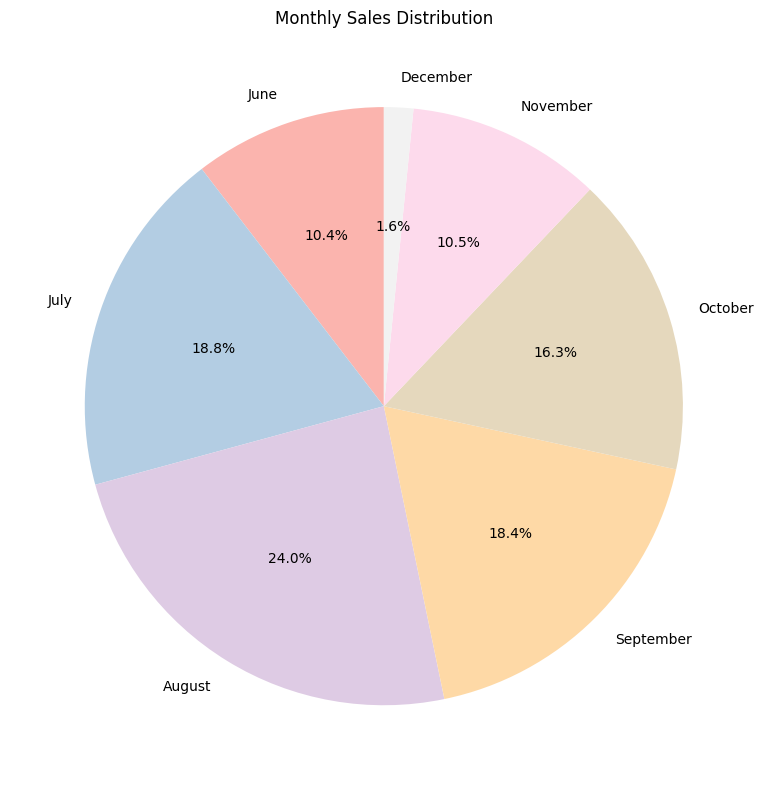

In [26]:
# Create the pie chart
plt.figure(figsize=(8, 8))
monthly_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Pastel1')

# Add title and display the chart
plt.title('Monthly Sales Distribution')
plt.ylabel('')  # Hide the default y-axis label
plt.tight_layout()
plt.show()
